# Homework 4

In this assignment you will construct a `DataFrame` with information about the current components of the S&P 500 index.

## Getting data

Use the `pd.read_html` function to download the table of company data on this web site:

https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

Note that the function returns a **list** of DataFrames, so you have to identify the element of that list that contains the DataFrame you want. Store this DataFrame in a variable called `comps`.

In [1]:
import pandas as pd

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [4]:
df_list = pd.read_html(url)

In [4]:
comps = df_list[0]

Display the first 5 rows of `comps`.

In [5]:
comps.head(5)

,0,1,2,3,4,5,6,7,8
0,Security,Symbol,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
1,3M Company,MMM,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,0000066740,1902
2,Abbott Laboratories,ABT,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
3,AbbVie Inc.,ABBV,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
4,ABIOMED Inc,ABMD,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981


## Cleaning

Make the following changes to `comps`:
 - Drop columns *SEC filings*, *GICS Sub Industry*, and *Founded*
 - Rename the remaining columns **name**, **ticker**, **sector**, **address**, **date**, and **cik**
 - Set the index to be **ticker**
 

In [6]:
columns = list(comps.loc[0].values)

In [7]:
comps.drop(comps.index[0], axis = 0,inplace =True)

In [8]:
comps.columns = columns

In [9]:
# comps.head()

In [10]:
comps.drop(['SEC filings','GICS Sub Industry','Founded'], axis = 1, inplace = True)

In [11]:
# comps.head()

In [12]:
comps.columns = ['name', 'ticker', 'sector', 'address', 'date','cik']

In [13]:
comps.index = comps['ticker']

In [14]:
comps.head()

,name,ticker,sector,address,date,cik
ticker,,,,,,
MMM,3M Company,MMM,Industrials,"St. Paul, Minnesota",NaN,0000066740
ABT,Abbott Laboratories,ABT,Health Care,"North Chicago, Illinois",1964-03-31,0000001800
ABBV,AbbVie Inc.,ABBV,Health Care,"North Chicago, Illinois",2012-12-31,0001551152
ABMD,ABIOMED Inc,ABMD,Health Care,"Danvers, Massachusetts",2018-05-31,0000815094
ACN,Accenture plc,ACN,Information Technology,"Dublin, Ireland",2011-07-06,0001467373


Use `dtypes` to check how each column is stored.

In [15]:
comps.dtypes

name       object
ticker     object
sector     object
address    object
date       object
cik        object
dtype: object

Notice that `date` is stored as text (which pandas lists as *object*). Use the `pd.to_datetime` function to convert the date into a pandas `datetime` object.

In [16]:
comps['date'] = pd.to_datetime(comps['date'])

In [17]:
comps.dtypes

name               object
ticker             object
sector             object
address            object
date       datetime64[ns]
cik                object
dtype: object

## Analysis

It is always a good idea to start by *looking* at your data to get a sense of what it contains and what sort of errors there may be.

Start by asking: How many records are in this dataframe? Use *one* simple function in one line to find out. 

In [18]:
len(comps)

505

Does the answer surprise you? Try to explain it. 

Hint: Are there any CIKs that appear more than once? Why?

In [19]:
len(comps['cik'].unique())

500

One CIK I observed was for Google. I conclude that cik is assigned to each unique company while each company may have different security(name)

Alphabet Inc Class A
GOOGL
reports
Communication Services
Interactive Media & Services
Mountain View, California
2014-04-03
0001652044 
1998 
Alphabet Inc Class C
GOOG
reports
Communication Services
Interactive Media & Services
Mountain View, California
2006-04-03
0001652044 
1998 


In [102]:
comps.head()

,name,ticker,sector,address,date,cik
ticker,,,,,,
MMM,3M Company,MMM,Industrials,"St. Paul, Minnesota",NaT,0000066740
ABT,Abbott Laboratories,ABT,Health Care,"North Chicago, Illinois",1964-03-31,0000001800
ABBV,AbbVie Inc.,ABBV,Health Care,"North Chicago, Illinois",2012-12-31,0001551152
ABMD,ABIOMED Inc,ABMD,Health Care,"Danvers, Massachusetts",2018-05-31,0000815094
ACN,Accenture plc,ACN,Information Technology,"Dublin, Ireland",2011-07-06,0001467373


Notice that the date for **MMM** is missing. How many rows are missing the date?

In [20]:
comps.loc['MMM']

name                3M Company
ticker                     MMM
sector             Industrials
address    St. Paul, Minnesota
date                       NaT
cik                 0000066740
Name: MMM, dtype: object

In [23]:
missing = comps['date'].isnull().sum() #103 rows have the date as null

In [25]:
print("The number of rows missing the date are ",missing)

The number of rows missing the date are  103


Add a column called `age` that has the number of years since the company was first added to the index.

Hint: Since `date` is now stored as a `datetime` object, we can access the year using its `.dt.year` property. Just subtract the initial year from 2019.

In [26]:
comps['age'] = 2019 - comps['date'].dt.year

In [27]:
comps.head()

,name,ticker,sector,address,date,cik,age
ticker,,,,,,,
MMM,3M Company,MMM,Industrials,"St. Paul, Minnesota",NaT,0000066740,NaN
ABT,Abbott Laboratories,ABT,Health Care,"North Chicago, Illinois",1964-03-31,0000001800,55.0
ABBV,AbbVie Inc.,ABBV,Health Care,"North Chicago, Illinois",2012-12-31,0001551152,7.0
ABMD,ABIOMED Inc,ABMD,Health Care,"Danvers, Massachusetts",2018-05-31,0000815094,1.0
ACN,Accenture plc,ACN,Information Technology,"Dublin, Ireland",2011-07-06,0001467373,8.0


Use the code below to plot a histogram of the `age` column.

<IPython.core.display.Javascript object>


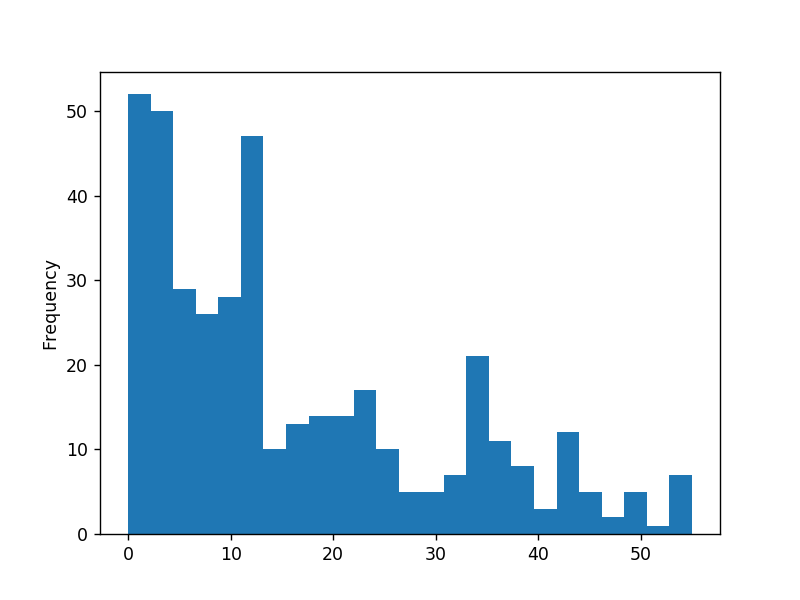

In [28]:
%matplotlib notebook
comps['age'].plot('hist', bins=25)

How long has the average firm been in the index? What about the median? How long has the oldest firm been in the index? All of these questions can be answered with the `.describe()` method.

Note also how many firms you have results for, and comment on what this means.

In [29]:
avg_age = (comps['age'].fillna(0).sum())/(len(comps['ticker'].unique()))
median = comps['age'].fillna(0).median()

In [30]:
print("The average firm been in index is ",avg_age," and the median is ", median)

The average firm been in index is  12.93861386138614  and the median is  8.0


In [31]:
no_of_firms = len(comps['ticker'].unique())

In [32]:
print("The number of firms is", no_of_firms)

The number of firms is 505


What is the earliest `date` in the data?

In [33]:
earliest_date = comps['date'].min()
print("the earliest date in the data is ",earliest_date.date())

the earliest date in the data is  1964-03-31


Which firms have been in the index since that date?

In [34]:
list(comps[comps['date'] == earliest_date]['name'])

['Abbott Laboratories', 'Arconic Inc.', "Honeywell Int'l Inc."]

How many companies are there in each sector?

In [35]:
by_sector = comps.groupby(by = "sector")

In [36]:
df = pd.DataFrame(by_sector.count()['name'])

In [37]:
df.rename(columns = {'name': 'No of Companies'})

,No of Companies
sector,
Communication Services,26
Consumer Discretionary,64
Consumer Staples,33
Energy,29
Financials,70
Health Care,62
Industrials,70
Information Technology,66
Materials,26


## Working with text data

Use the `.str.extract()` function to create a new column, *state*, with the state name from the *address* columns.

Hint: You will need to pass a regular expression that identifies the state. Before coming up with a regular expression look at the examples below:

In [38]:
comps.loc[['ACN', 'BHF', 'BSX', 'BXP']]

,name,ticker,sector,address,date,cik,age
ticker,,,,,,,
ACN,Accenture plc,ACN,Information Technology,"Dublin, Ireland",2011-07-06,0001467373,8.0
BHF,Brighthouse Financial Inc,BHF,Financials,"Charlotte, North Carolina",2017-08-08,0001685040,2.0
BSX,Boston Scientific,BSX,Health Care,"Marlborough, Massachusetts[4]",1995-02-24,0000885725,24.0
BXP,Boston Properties,BXP,Real Estate,"Boston, Massachusetts",2006-04-03,0001037540,13.0


In [39]:
comps['state'] = comps['address'].str.extract('([,]([\s][A-Za-z\s\.]+))')[1]

In [40]:
comps.head()

,name,ticker,sector,address,date,cik,age,state
ticker,,,,,,,,
MMM,3M Company,MMM,Industrials,"St. Paul, Minnesota",NaT,0000066740,NaN,Minnesota
ABT,Abbott Laboratories,ABT,Health Care,"North Chicago, Illinois",1964-03-31,0000001800,55.0,Illinois
ABBV,AbbVie Inc.,ABBV,Health Care,"North Chicago, Illinois",2012-12-31,0001551152,7.0,Illinois
ABMD,ABIOMED Inc,ABMD,Health Care,"Danvers, Massachusetts",2018-05-31,0000815094,1.0,Massachusetts
ACN,Accenture plc,ACN,Information Technology,"Dublin, Ireland",2011-07-06,0001467373,8.0,Ireland


How many companies are there headquartered in each state? Do you any problems with your result?

In [41]:
by_state = comps.groupby(by = 'state')

In [42]:
by_state.count()['name']

state
 Alabama                        2
 Arizona                        4
 Arkansas                       3
 Bermuda                        1
 California                    78
 Colorado                      10
 Connecticut                   13
 D.C.                           1
 Delaware                       1
 Florida                       15
 Georgia                       17
 Idaho                          2
 Illinois                      30
 Indiana                        7
 Iowa                           1
 Ireland                        9
 Kent                           1
 Kentucky                       3
 Kingdom of the Netherlands     1
 Louisiana                      3
 Maine                          1
 Maryland                      10
 Massachusetts                 22
 Michigan                      10
 Minnesota                     13
 Missouri                      10
 Nebraska                       2
 Netherlands                    2
 Nevada                         2
 New Jer

Yes I do have some problems in my result. Ireland, UK and united kingdom, Surrey, Switzerland are included which are not in the United States

In [43]:
s = by_state.count()['name']

In [44]:
s.index = s.index.str.strip()

In [45]:
s = s[~s.index.isin(['UK','United Kingdom','Ireland','Switzerland','Bermuda','Kent','Kingdom of the Netherlands','Surrey'])]

In [46]:
#Only states in the United States
s

state
Alabama            2
Arizona            4
Arkansas           3
California        78
Colorado          10
Connecticut       13
D.C.               1
Delaware           1
Florida           15
Georgia           17
Idaho              2
Illinois          30
Indiana            7
Iowa               1
Kentucky           3
Louisiana          3
Maine              1
Maryland          10
Massachusetts     22
Michigan          10
Minnesota         13
Missouri          10
Nebraska           2
Netherlands        2
Nevada             2
New Jersey        17
New York          62
North Carolina    13
Ohio              20
Oklahoma           4
Oregon             2
Pennsylvania      16
Rhode Island       4
Tennessee          9
Texas             37
Utah               2
Virginia          16
Washington        12
Wisconsin          8
Name: name, dtype: int64